# About this project

I got this dataset from [Kaggle](https://www.kaggle.com/competitions/bike-sharing-demand/data?select=sampleSubmission.csv) which was among Kaggle competitions. In this competition, participants were asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

I tried to extract insights from the data using various visualizations. These visuals helped me understand the most in-demand times for bike sharing, including the most popular time of day, day of the week, and hour. 

Extracting some time features from the timedate feature, helped me to transmit data to a regression task. This [Kaggle Notebook](https://www.kaggle.com/code/wildwildeast/acada6-group-4-ryan-siwei-lanfong) gave me some good ideas.

The following is the list of features within this dataset with some description.
 

1.  datetime:hourly date + timestamp  
2.  season: 1 = spring, 2 = summer, 3 = fall, 4 = winter 
3.  holiday: whether the day is considered a holiday
4.  workingday: whether the day is neither a weekend nor holiday
5.  weather: 

-  1: Clear, Few clouds, Partly cloudy, Partly cloudy
-  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
-  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
-  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 


6.  temp: temperature in Celsius
7.  atemp: "feels like" temperature in Celsius
8.  humidity: relative humidity
9.  windspeed: wind speed
10.  casual: number of non-registered user rentals initiated
11.  registered: number of registered user rentals initiated
12.  count: number of total rentals

# Load Data

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import statsmodels.api as sm


In [2]:
train  = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
display(train.head())
display(test.head())

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [3]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


# 2. Preprocessing & EDA

In [3]:
#create a copy version of train data to avoid applying changes into train data
data = train.copy()

## Feature extraction (1)

In [4]:
# extracting year, month, hour and day of week
data['year'] = pd.DatetimeIndex(data['datetime']).year
data['month'] = pd.DatetimeIndex(data['datetime']).month
data['hour'] = pd.DatetimeIndex(data['datetime']).hour
data['dayofweek'] = pd.DatetimeIndex(data['datetime']).day_name()


## Modify incorrect datatype (2)

In [5]:

categorical = ["season", "holiday", "workingday", "weather", "year", "month", "hour", "dayofweek"]

diction = {}
for cat in categorical:
    diction[cat]  = "category"

# print(diction)

data = data.astype(diction)


In [8]:
data.describe()

temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered         count  
count  10886.000000  10886.000000  
mean     155.552177    191.574132  
std      151.039033    181.144454  
min        0.000000      1.000000  
25%       36.000000     42.000000  
50%      118.000000    145.000000  
75%      222.000000    284.000000  
max      886.000000    977.000000

## Visualization

### Plot a histogram of the count variable 


Text(0.5, 0, 'Total count')

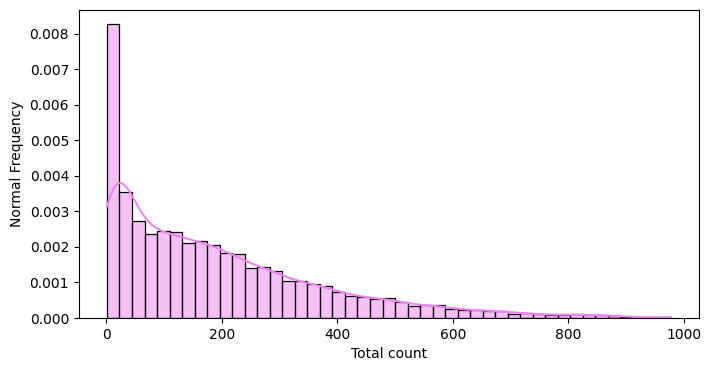

In [9]:
fig, ax = plt.subplots(figsize=(8,4))

sns.histplot(data["count"], color="violet", label="100% Equities", kde=True, stat="density", ax=ax)
ax.set_ylabel("Normal Frequency")
ax.set_xlabel("Total count")
#ax.set_title("Histogram and Density Plot of the count Variable")

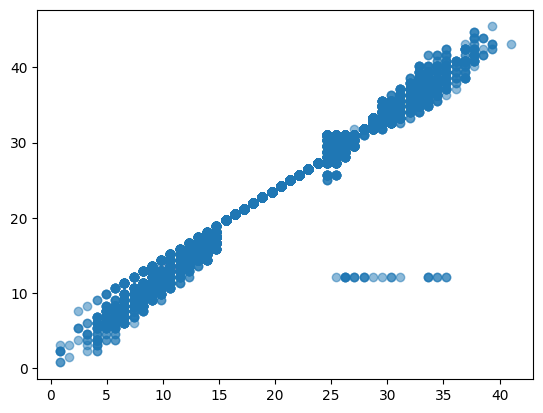

In [10]:
plt.scatter(x=data['temp'], y= data['atemp'], alpha=0.5)


### Relationship between contiouns features and the target feature `count`.

Since there is a high correlation between `temp` and `atemp` we will not consider the `atemp` feature. Besides, `casual` and `registered` features do not seem important. So we ignore these two as well. Let's check the effect of other weather features on the target feature `count`.

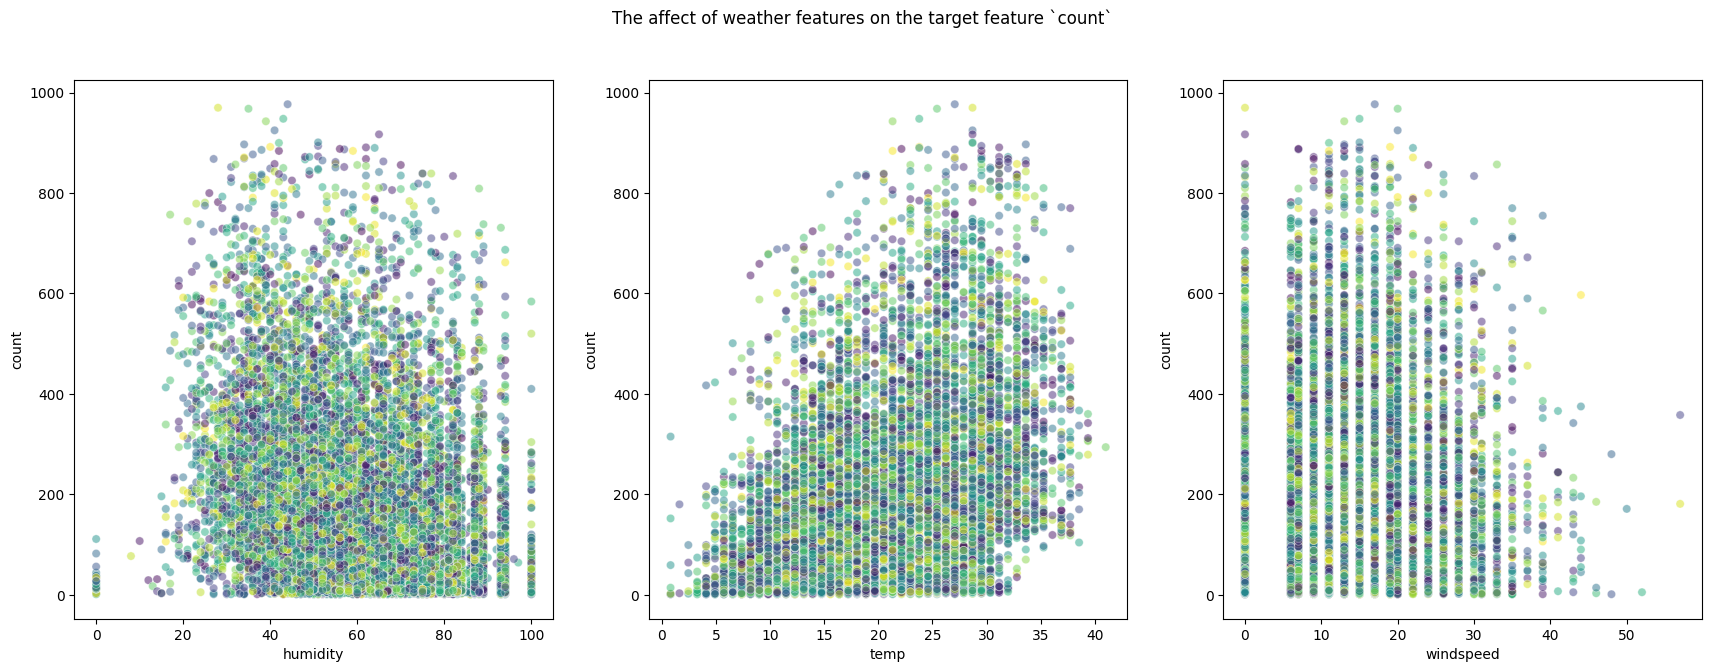

In [9]:
colors = np.random.rand(10886)
continuos = ['humidity', 'temp', 'windspeed']

fig , ax = plt.subplots(1,3, figsize = (21,7))
fig.suptitle("The affect of weather features on the target feature `count`")

for ind, c in enumerate(continuos):
    sns.scatterplot(x = data[c], y= data['count'], alpha=0.5, ax = ax[ind], c = colors)
    ax[ind].set_xlabel(c)
    ax[ind].set_ylabel('count')

Let's try to better undertand the linear relationship between each of above features with the target feature using another type of Seaborn plots `sns.regplot` which fits a simple linear regression model on data and return the regression line and 95% confidence (translucent band).

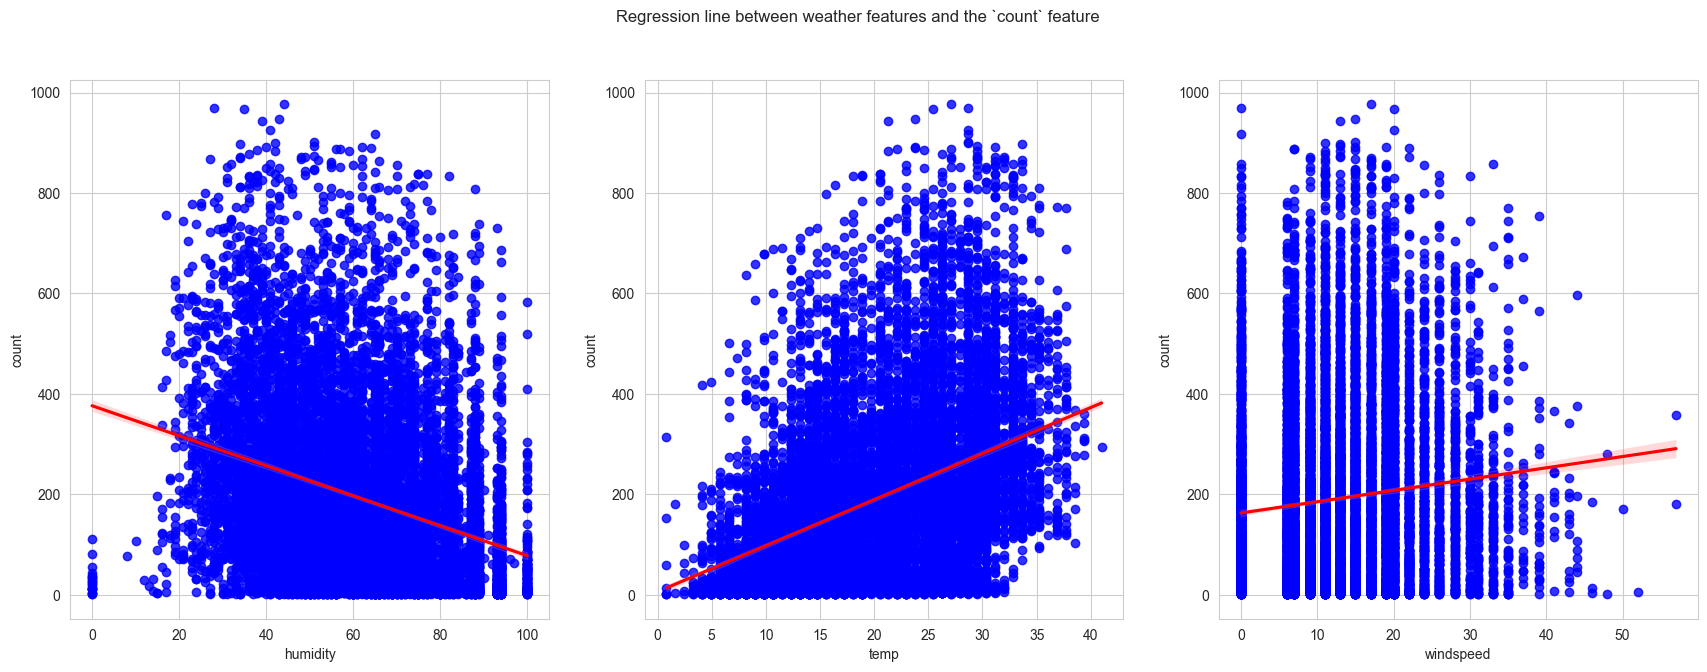

In [27]:
fig , ax = plt.subplots(1,3, figsize = (21,7))
fig.suptitle("Regression line between weather features and the `count` feature")

for ind, c in enumerate(continuos):
    sns.regplot(x = data[c], y= data['count'], ax = ax[ind], scatter_kws={'color': 'b'}, line_kws={'color': 'r'})
    ax[ind].set_xlabel(c)
    ax[ind].set_ylabel('count')

#### Regression analysis between weather features and the `count` feature

Let's find the slop of the regression lines to see a unite increase in any of the continuous features, how much value increase or decreas the `count` feature.

In [31]:
X_reg = data[['humidity', 'temp', 'windspeed']]
y_reg = data['count']

X_reg = sm.add_constant(X_reg)

model = sm.OLS(y_reg, X_reg)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     1154.
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:07:27   Log-Likelihood:                -70542.
No. Observations:               10886   AIC:                         1.411e+05
Df Residuals:                   10882   BIC:                         1.411e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        177.6340      7.914     22.446      0.0

The above table reflects the following information:

1. One-unite increases in humidity, will result in 2.7-unit dcrease bikesharing demand.  The 95% confidence interval for `humidity is [-2.871, -2.545], indicating that we are 95% confident that the true population coefficient lies within this range.
2. One-unite increase is tempreture will result in 8.7-unit increase in bikesharing demand.
3. There is no significant relationship between windspeed and demand for bikesharing.

### Frequency of `count` feature and its distribution with respect to categorical features

#### 1. Timing features

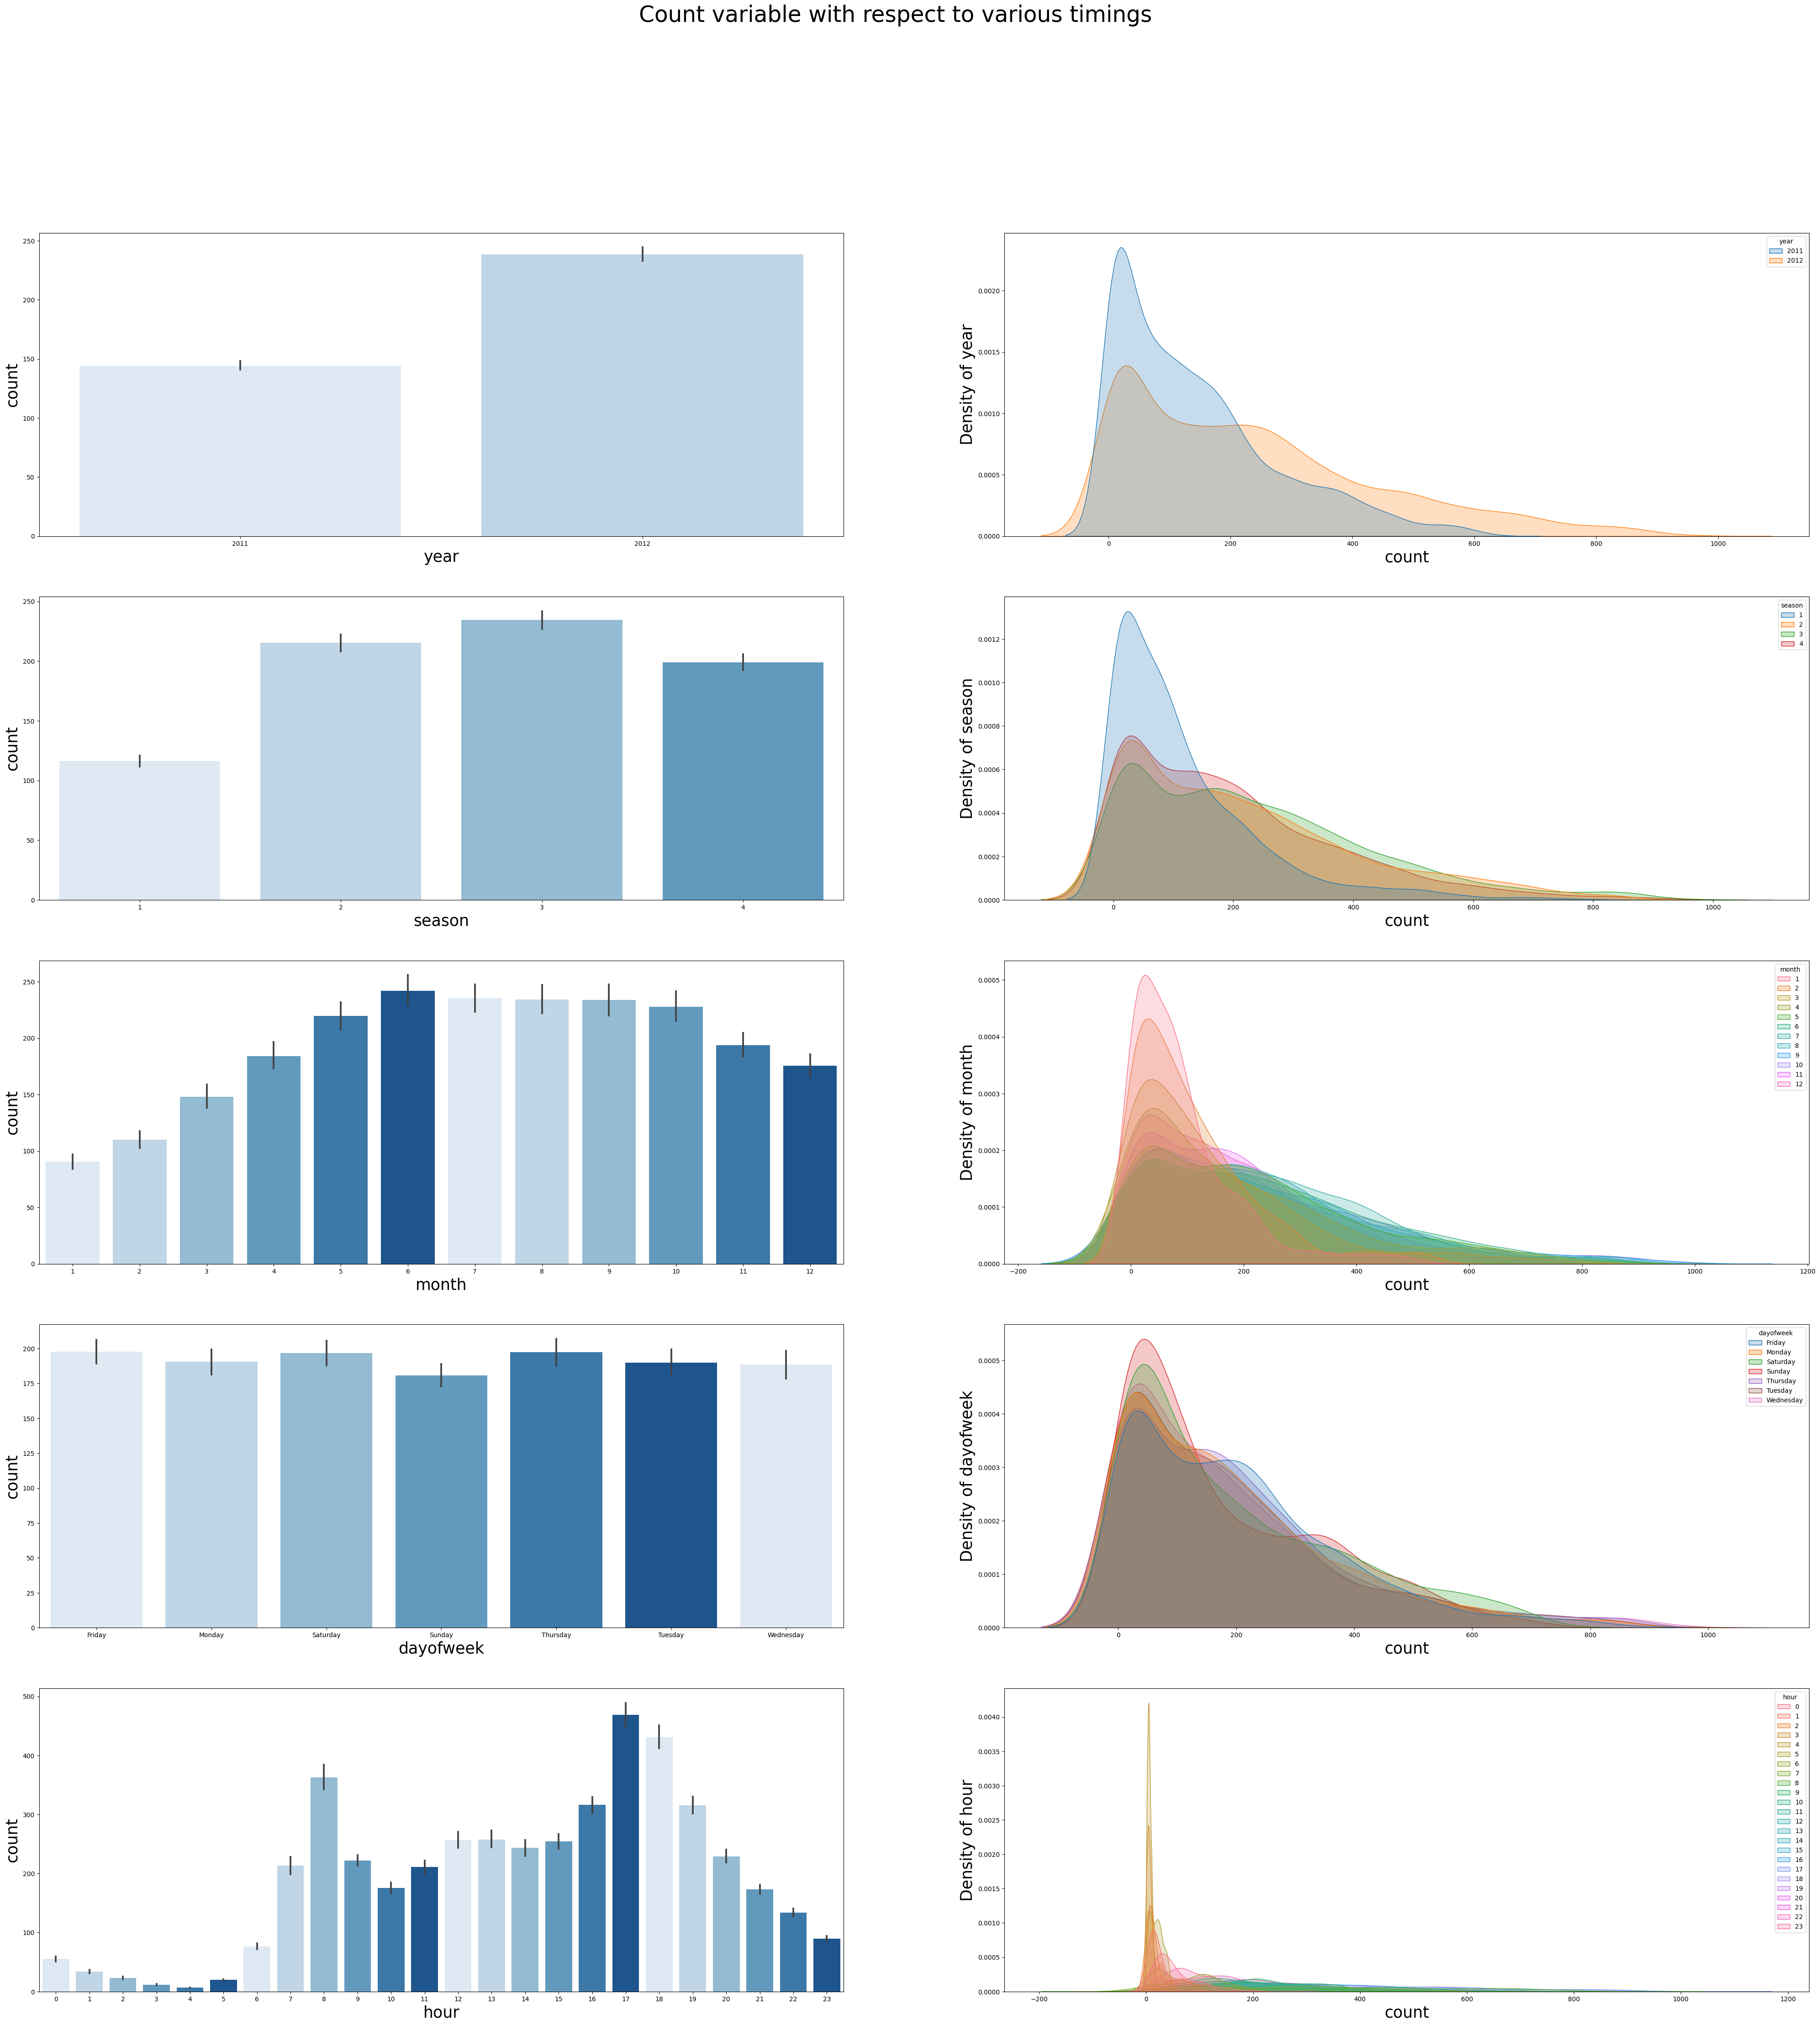

In [12]:
timing = ["year", "season", "month", "dayofweek" , "hour"]
colors = sns.color_palette("Blues")

fig, ax = plt.subplots(5,2, figsize=(50, 50))
fig.suptitle('Count variable with respect to various timings', fontsize= 35)

for ind,t in enumerate(timing):
    sns.barplot(data = data, x= t ,y = 'count', palette=colors ,ax = ax[ind,0])
    ax[ind,0].set_xlabel(t, fontsize=25)
    ax[ind,0].set_ylabel("count", fontsize=25)

    sns.kdeplot(data = data, x= "count", hue = t , fill = True, ax = ax[ind,1])
    ax[ind,1].set_xlabel("count", fontsize=25)
    ax[ind,1].set_ylabel(f"Density of {t}", fontsize=25)


<AxesSubplot: xlabel='month', ylabel='count'>

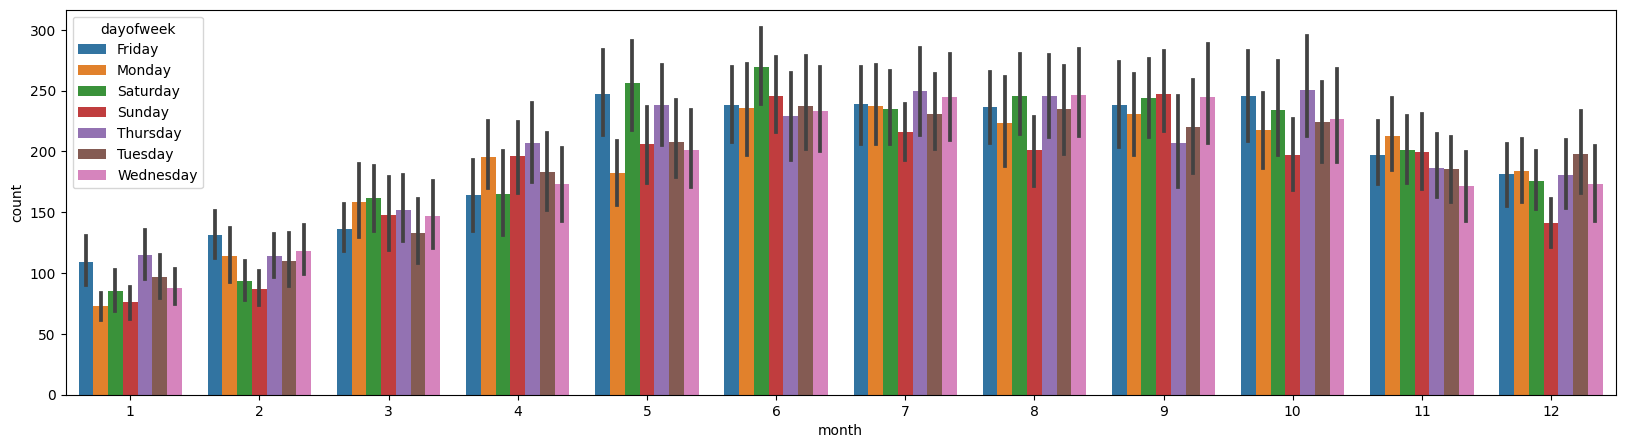

In [13]:
fig, ax = plt.subplots(figsize = (20,5))
sns.barplot(data = data, x = "month" ,y = 'count', hue = 'dayofweek')

<AxesSubplot: xlabel='year', ylabel='count'>

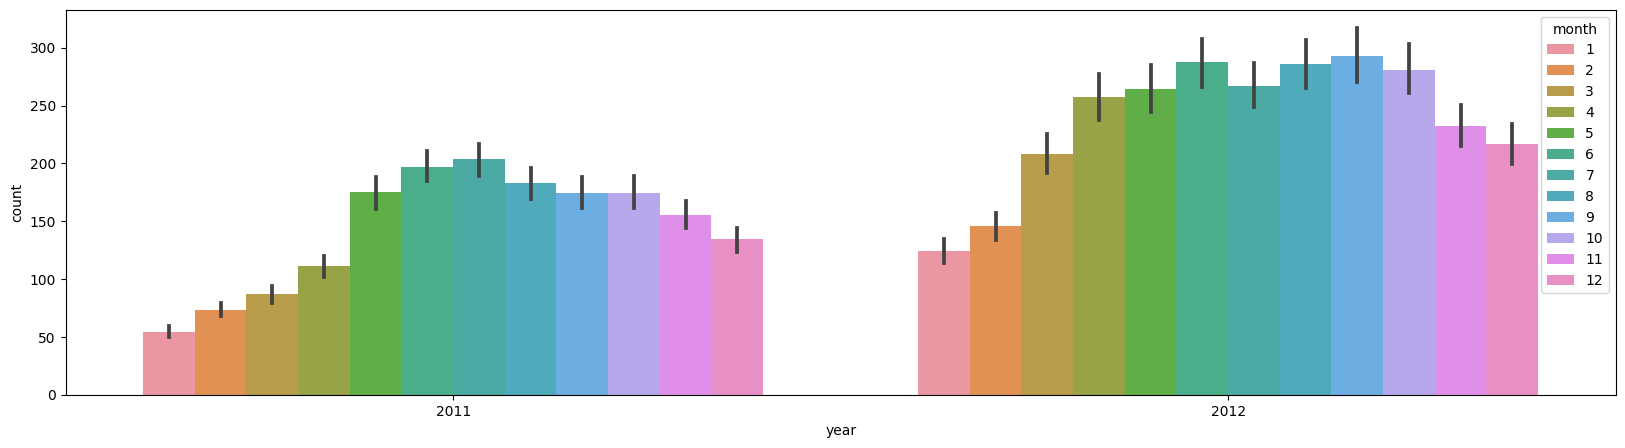

In [14]:
fig, ax = plt.subplots(figsize = (20,5))
sns.barplot(data = data, x = "year" ,y = 'count', hue = 'month')

<AxesSubplot: xlabel='season', ylabel='count'>

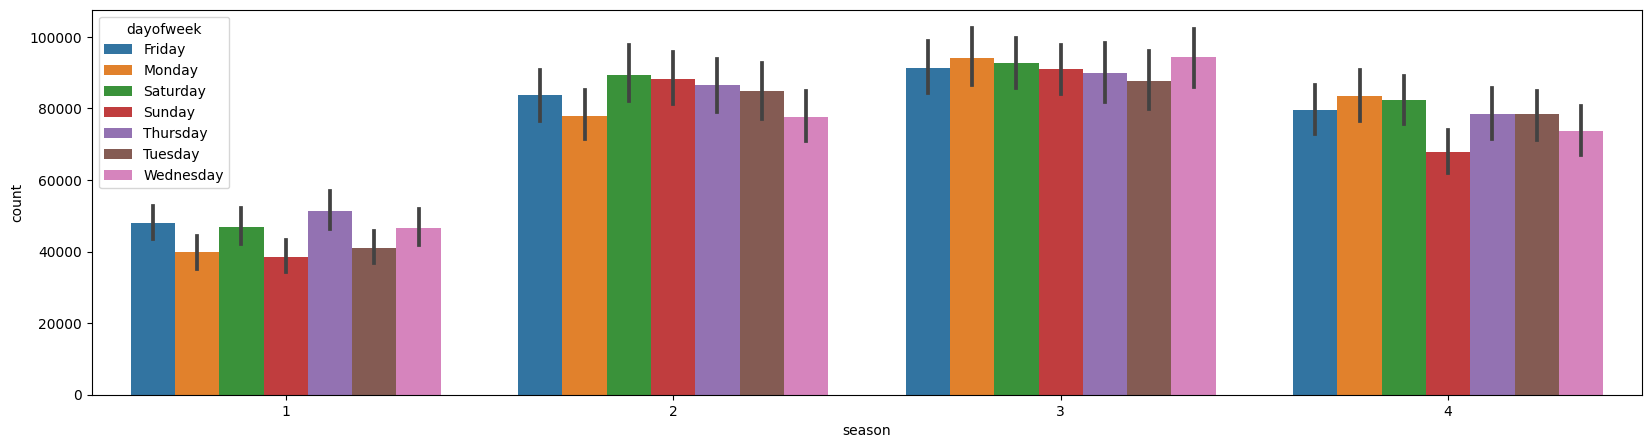

In [15]:
fig, ax = plt.subplots(figsize = (20,5))
sns.barplot(data = data, x = "season" ,y = 'count', hue = 'dayofweek', estimator = 'sum')

#### 2. Working and holiday features

In [16]:
type_hol = ["holiday", "workingday"]

fig, ax = plt.subplots(2,2, figsize=(20, 10))
#fig.suptitle('Count variable with respect to holiday and workingdays', fontsize= 15)

for ind,t in enumerate(type_hol):
    sns.barplot(data = data, x= t ,y= 'count', ax = ax[ind,0], estimator = "sum", )
    ax[ind,0].set_xlabel(t)
    ax[ind,0].set_ylabel("count")
    ax[ind, 0].set_title(f"sum of count variable within each class of {t} ")

    sns.kdeplot(data = data, x= "count", hue = t , fill = True, ax = ax[ind,1])
    ax[ind,1].set_xlabel("count",)
    ax[ind,1].set_ylabel(f"Density of {t}")
    ax[ind, 1].set_title(f"Density of count variable with repect to claases of {t} variable")



#### 3. Weather feature

C:\Users\solmaz\AppData\Local\Temp\ipykernel_21920\1072481164.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = data, x= "count", hue = "weather" , fill = True, ax = ax[1])


Text(0.5, 1.0, 'Density of count variable with repect to weather condition')

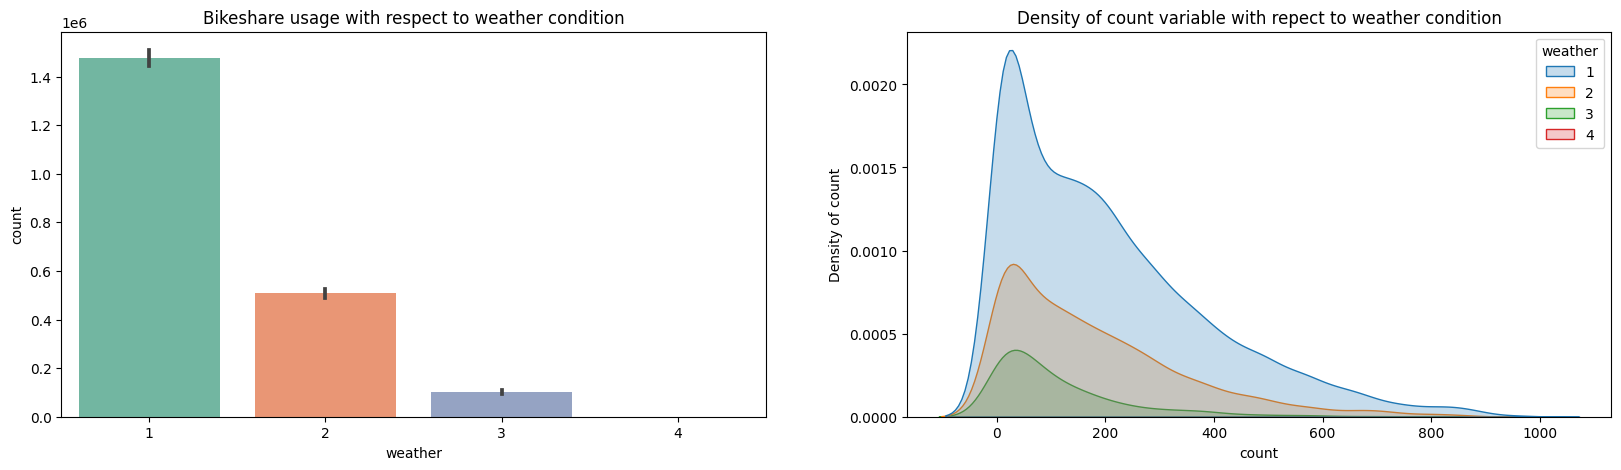

In [17]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
colors = sns.color_palette("Set2", )

sns.barplot(data = data, x= 'weather' , y= 'count', ax = ax[0], estimator = "sum",palette=colors )
ax[0].set_xlabel("weather")
ax[0].set_ylabel("count")
ax[0].set_title("Bikeshare usage with respect to weather condition")

sns.kdeplot(data = data, x= "count", hue = "weather" , fill = True, ax = ax[1])
ax[1].set_xlabel("count",)
ax[1].set_ylabel(f"Density of count")
ax[1].set_title(f"Density of count variable with repect to weather condition")



### Time series and line chart visuals

In [18]:
fig = go.Figure([go.Scatter(x = data['datetime'], y = data['count'])])
fig.show()

Text(0.5, 0, 'month')

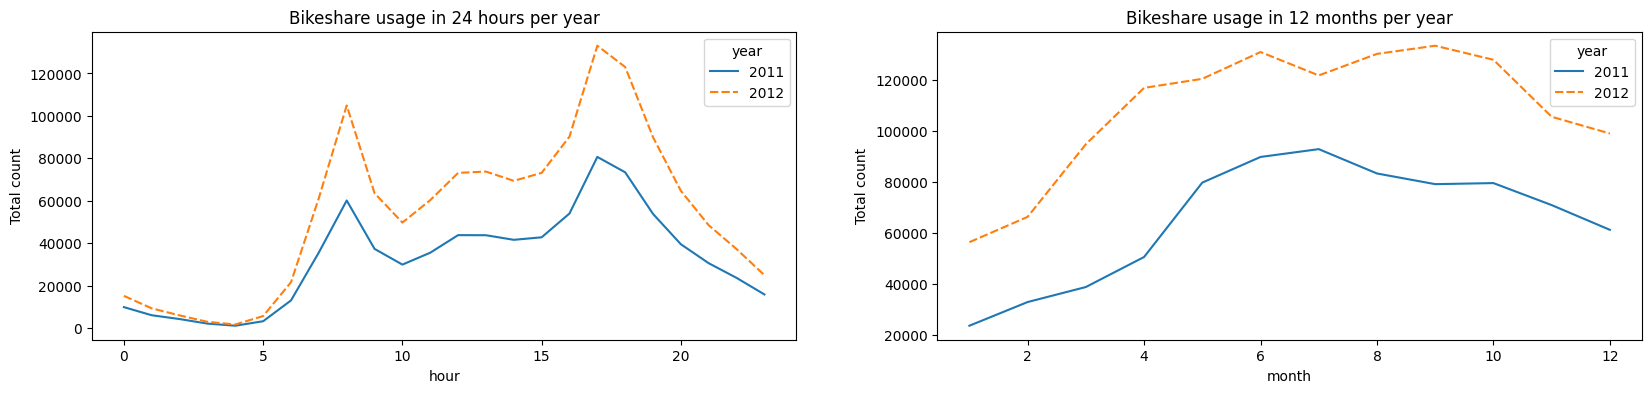

In [20]:
fig, ax = plt.subplots(1,2, figsize= (20,4))
data_grouped= data.groupby(["hour", "year"]).sum(numeric_only= True)['count'].unstack()#.plot(xticks= range(24), ax =ax[0])
sns.lineplot(data_grouped, ax= ax[0])
ax[0].set_title("Bikeshare usage in 24 hours per year")
ax[0].set_ylabel("Total count")
ax[0].set_xlabel("hour")

data_grouped = data.groupby(["month", "year"]).sum(numeric_only= True)['count'].unstack()#.plot( xticks= range(13), ax =ax[1])
sns.lineplot(data_grouped, ax = ax[1])
ax[1].set_title("Bikeshare usage in 12 months per year")
ax[1].set_ylabel("Total count")
ax[1].set_xlabel("month")

<AxesSubplot: xlabel='yearmonth'>

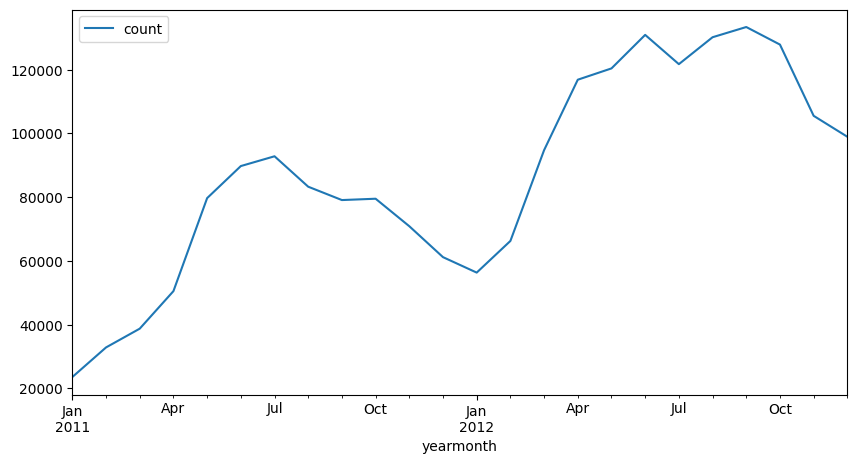

In [61]:
data_month  = data.copy()
data_month['datetime'] = pd.to_datetime(data_month['datetime'])

data_month ['yearmonth'] = data_month['datetime'].dt.to_period('M')
data_month.groupby("yearmonth").sum(numeric_only=True)['count'].plot(legend=True, figsize = (10,5))


## Correlation analysis

<AxesSubplot: >

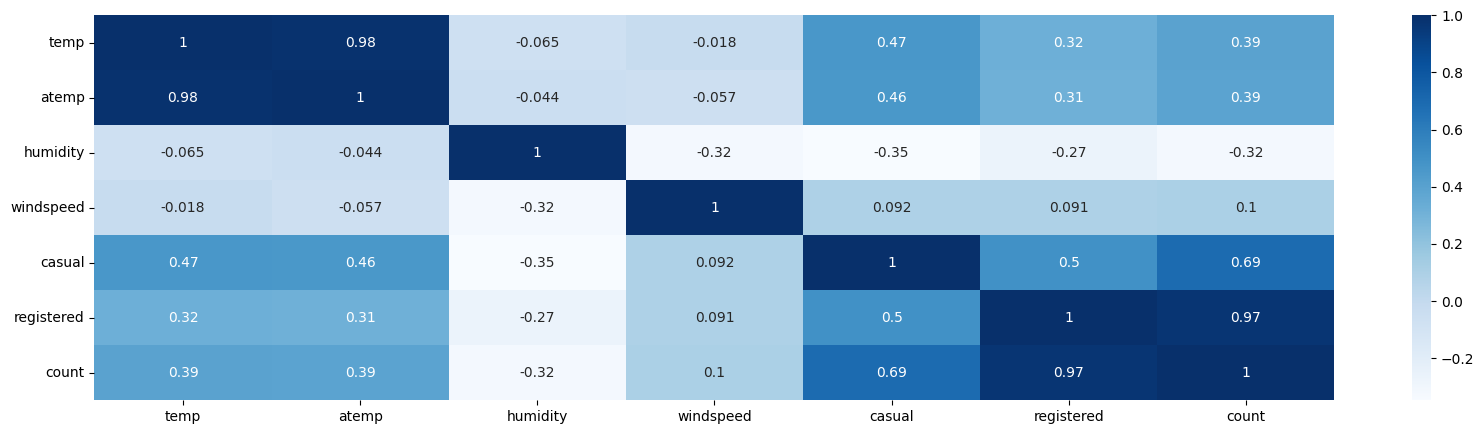

In [95]:
fig , ax = plt.subplots(figsize = (20,5))
sns.heatmap(data.corr(numeric_only= True), cmap="Blues", annot= True)

## Drop highly correlated features + `datetime` feature  since it is not informative anymore (3)

In [8]:
data  = data.drop (["atemp", "casual", "registered", "datetime"], axis = 1)

## Feature encoding (4)

The one-hot encoding dramatically changes the result. I tested the results before one-hot encoding and after that: applying one-hot encoding outperforms the performance (about 40% in linear regression)

In [9]:
data2 = pd.get_dummies(data, columns=['weather', 'season', 'year', 'month', 'hour', 'dayofweek'])
data2.head()

holiday workingday  temp  humidity  windspeed  count  weather_1  weather_2  \
0       0          0  9.84        81        0.0     16          1          0   
1       0          0  9.02        80        0.0     40          1          0   
2       0          0  9.02        80        0.0     32          1          0   
3       0          0  9.84        75        0.0     13          1          0   
4       0          0  9.84        75        0.0      1          1          0   

   weather_3  weather_4  ...  hour_21  hour_22  hour_23  dayofweek_Friday  \
0          0          0  ...        0        0        0                 0   
1          0          0  ...        0        0        0                 0   
2          0          0  ...        0        0        0                 0   
3          0          0  ...        0        0        0                 0   
4          0          0  ...        0        0        0                 0   

   dayofweek_Monday  dayofweek_Saturday  dayofweek_Sunday  dayofweek_Thursday  \
0                 0                   1                 0                   0   
1                 0                   1                 0                   0   
2                 0                   1                 0                   0   
3                 0                   1                 0                   0   
4                 0                   1                 0                   0   

   dayofweek_Tuesday  dayofweek_Wednesday  
0                  0                    0  
1                  0                    0  
2                  0                    0  
3                  0                    0  
4                  0                    0  

[5 rows x 59 columns]

In [10]:
data

season holiday workingday weather   temp  humidity  windspeed  count  \
0          1       0          0       1   9.84        81     0.0000     16   
1          1       0          0       1   9.02        80     0.0000     40   
2          1       0          0       1   9.02        80     0.0000     32   
3          1       0          0       1   9.84        75     0.0000     13   
4          1       0          0       1   9.84        75     0.0000      1   
...      ...     ...        ...     ...    ...       ...        ...    ...   
10881      4       0          1       1  15.58        50    26.0027    336   
10882      4       0          1       1  14.76        57    15.0013    241   
10883      4       0          1       1  13.94        61    15.0013    168   
10884      4       0          1       1  13.94        61     6.0032    129   
10885      4       0          1       1  13.12        66     8.9981     88   

       year month hour  dayofweek  
0      2011     1    0   Saturday  
1      2011     1    1   Saturday  
2      2011     1    2   Saturday  
3      2011     1    3   Saturday  
4      2011     1    4   Saturday  
...     ...   ...  ...        ...  
10881  2012    12   19  Wednesday  
10882  2012    12   20  Wednesday  
10883  2012    12   21  Wednesday  
10884  2012    12   22  Wednesday  
10885  2012    12   23  Wednesday  

[10886 rows x 12 columns]

# Model training

## Split data (4)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



In [12]:
y_nm = np.log(data2['count']) # Using this normalization outperforms the r2-score about 15%
X = data2.drop("count", axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y_nm, test_size=.25)

## Normalization (5)

In [13]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Performance function

In [14]:
def performance(model):
    train_performance = []
    test_performance = []
    train_performance.append(np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
    test_performance.append(np.sqrt(mean_squared_error(y_test,model.predict(X_test))))

    train_performance.append(mean_absolute_error(y_train,model.predict(X_train)))
    test_performance.append(mean_absolute_error(y_test,model.predict(X_test)))

    train_performance.append(r2_score(y_train,model.predict(X_train)))
    test_performance.append(r2_score(y_test,model.predict(X_test)))

    df_performance = pd.DataFrame([train_performance,test_performance], columns=['mean_squared_error', 'mean_absolute_error', 'r2_score'], index= ['trian','test'])
    display(df_performance)

    fig ,ax = plt.subplots(1,2, figsize = (10,4))
    sns.scatterplot(x = y_train, y = model.predict(X_train), ax = ax[0])
    sns.scatterplot(x = y_test, y = model.predict(X_test), ax = ax[1])
    plt.show()

    return train_performance, test_performance


## Linear Regression

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

performance(lr)


mean_squared_error  mean_absolute_error  r2_score
trian            0.618803             0.455853  0.825081
test             0.608635             0.450613  0.838933

([0.6188034455504308, 0.45585300142223023, 0.8250805223880493],
 [0.6086347543920485, 0.4506133284543783, 0.8389334424013448])

In [16]:
lr.predict(X_test[:1])

array([5.46144903])

In [42]:
-1.31e+3

-1310.0

# RandomForest

## RandomForest without any parameter setting

In [13]:

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

performance(rf)


mean_squared_error  mean_absolute_error  r2_score
trian            0.137859             0.088502  0.991409
test             0.370918             0.244283  0.938318

([0.1378586787159146, 0.08850233159481069, 0.9914090523014045],
 [0.3709177288868041, 0.24428334068710844, 0.9383176029175209])

In [28]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## RandomForest with parameteres

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=None, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.938 total time=   5.5s
[CV 2/5] END max_depth=None, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.933 total time=   4.9s
[CV 3/5] END max_depth=None, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.938 total time=   4.0s
[CV 4/5] END max_depth=None, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.937 total time=   4.0s
[CV 5/5] END max_depth=None, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.935 total time=   4.1s
[CV 1/5] END max_depth=None, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=0.938 total time=   5.1s
[CV 2/5] END max_depth=None, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, sc

mean_squared_error  mean_absolute_error  r2_score
trian            0.137075             0.087868  0.991506
test             0.372865             0.246526  0.937668

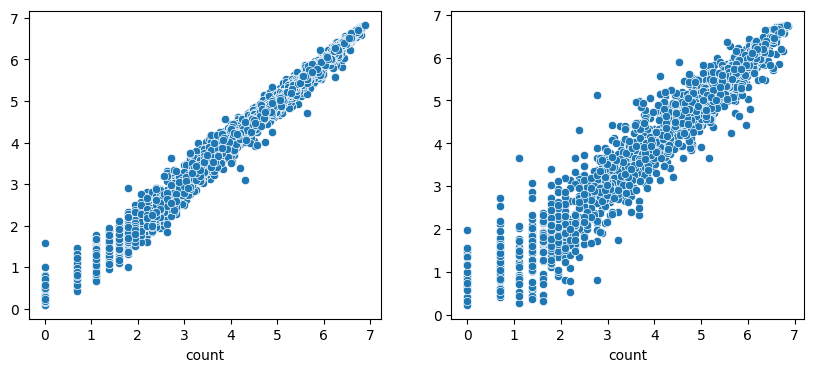

([0.1370754657391915, 0.0878678387829655, 0.9915063900742107],
 [0.3728647114912948, 0.2465255549896356, 0.9376683497886409])

In [14]:
# Number of trees in random forest
n_estimators = [100,125, 150]
# Number of features to consider at every split
max_features = [1.0, 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [None, 2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random 
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
               }

rf = RandomForestRegressor()
rf_grid = GridSearchCV(rf, parameters, verbose= 4, scoring = 'r2')
rf_grid.fit(X_train, y_train)
performance(rf_grid)

In [17]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

# ElasticNet

mean_squared_error  mean_absolute_error  r2_score
trian            1.438868             1.153927  0.064131
test             1.448886             1.160347  0.058816

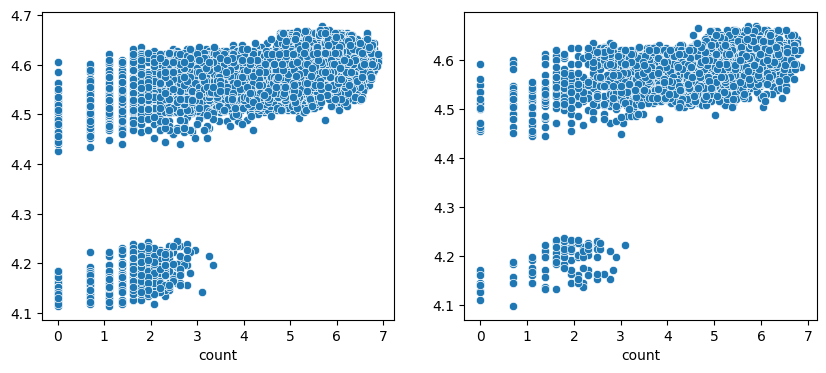

([1.4388681752891306, 1.1539270671090966, 0.06413142279783801],
 [1.4488863317954124, 1.1603468912481076, 0.05881566574928476])

In [18]:
eln = ElasticNet()
eln.fit(X_train, y_train)

performance(eln)

mean_squared_error  mean_absolute_error  r2_score
trian            0.614346             0.451629  0.829392
test             0.620248             0.454519  0.827521

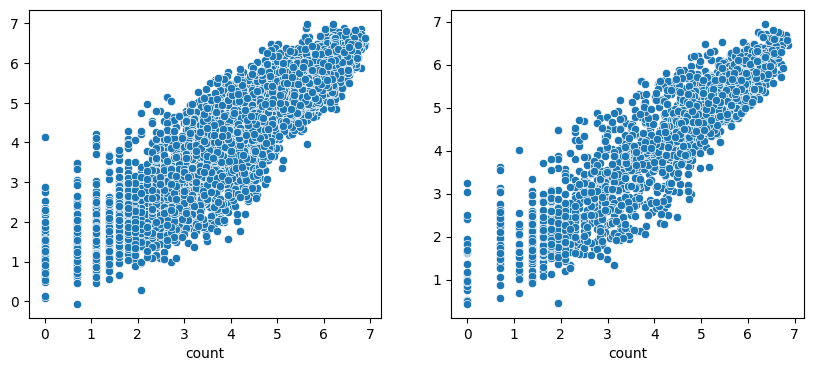

([0.614346119594072, 0.4516289552935792, 0.829392118379871],
 [0.6202484443050363, 0.45451926416652116, 0.8275205231680477])

In [19]:
elncv = ElasticNetCV(l1_ratio= [.01, .3,.5, .7,.9,.99])
elncv.fit(X_train, y_train)

performance(elncv)

In [54]:
elncv.l1_ratio_

0.5

## SVM

In [20]:
svr = SVR()
svr.fit(X_train, y_train)

performance(svr)

mean_squared_error  mean_absolute_error  r2_score
trian            0.250423             0.148694  0.971652
test             0.330196             0.211889  0.951118

([0.250422673650745, 0.1486939762405737, 0.9716521485962133],
 [0.33019575260628736, 0.21188941408877862, 0.951117993558413])

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....................kernel=linear;, score=0.817 total time=   8.4s
[CV 2/5] END .....................kernel=linear;, score=0.799 total time=   8.8s
[CV 3/5] END .....................kernel=linear;, score=0.805 total time=   9.2s
[CV 4/5] END .....................kernel=linear;, score=0.820 total time=   8.8s
[CV 5/5] END .....................kernel=linear;, score=0.811 total time=   8.4s
[CV 1/5] END .......................kernel=poly;, score=0.947 total time=   2.7s
[CV 2/5] END .......................kernel=poly;, score=0.949 total time=   2.1s
[CV 3/5] END .......................kernel=poly;, score=0.949 total time=   2.9s
[CV 4/5] END .......................kernel=poly;, score=0.951 total time=   2.9s
[CV 5/5] END .......................kernel=poly;, score=0.948 total time=   1.8s
[CV 1/5] END ........................kernel=rbf;, score=0.948 total time=   1.9s
[CV 2/5] END ........................kernel=rbf;,

mean_squared_error  mean_absolute_error  r2_score
trian            0.252174             0.150396  0.971697
test             0.325054             0.207541  0.950170

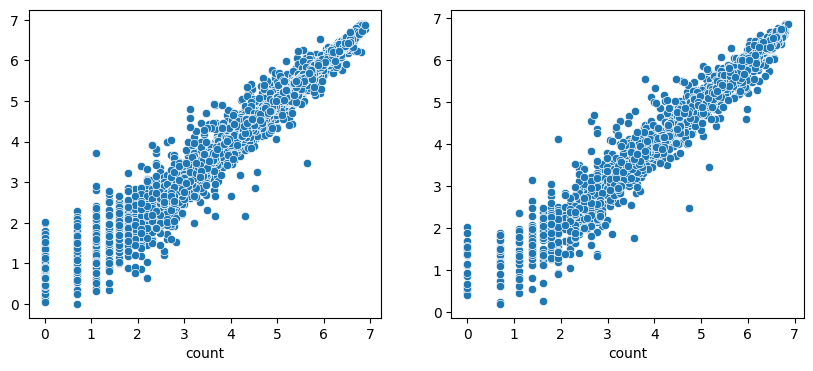

([0.25217426390195224, 0.15039633028748578, 0.9716965582884982],
 [0.3250540775368484, 0.20754128968637894, 0.95016979022893])

In [61]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

parameters = {'kernel' : kernel}

svr = SVR()
svr_1 = GridSearchCV(svr, parameters, verbose= 4, scoring = 'r2')
svr_1.fit(X_train, y_train)

performance(svr_1)



In [63]:
svr_1.best_params_

{'kernel': 'rbf'}

## GradientBoostingRegressor

In [23]:
gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

performance(gbr)

mean_squared_error  mean_absolute_error  r2_score
trian            0.480020             0.359506  0.895842
test             0.502034             0.375322  0.887001

([0.48002032352830976, 0.3595060167986592, 0.8958421271031373],
 [0.5020342647492001, 0.37532187888125945, 0.8870014741122102])

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END criterion=friedman_mse, n_estimators=150;, score=0.909 total time=   1.7s
[CV 2/5] END criterion=friedman_mse, n_estimators=150;, score=0.907 total time=   1.6s
[CV 3/5] END criterion=friedman_mse, n_estimators=150;, score=0.906 total time=   1.6s
[CV 4/5] END criterion=friedman_mse, n_estimators=150;, score=0.912 total time=   1.7s
[CV 5/5] END criterion=friedman_mse, n_estimators=150;, score=0.911 total time=   1.6s
[CV 1/5] END criterion=friedman_mse, n_estimators=200;, score=0.922 total time=   1.7s
[CV 2/5] END criterion=friedman_mse, n_estimators=200;, score=0.921 total time=   1.7s
[CV 3/5] END criterion=friedman_mse, n_estimators=200;, score=0.918 total time=   1.7s
[CV 4/5] END criterion=friedman_mse, n_estimators=200;, score=0.926 total time=   1.7s
[CV 5/5] END criterion=friedman_mse, n_estimators=200;, score=0.919 total time=   1.7s
[CV 1/5] END criterion=squared_error, n_estimators=150;, score=0.909 t

mean_squared_error  mean_absolute_error  r2_score
trian            0.397549             0.285598  0.928558
test             0.426495             0.305126  0.918448

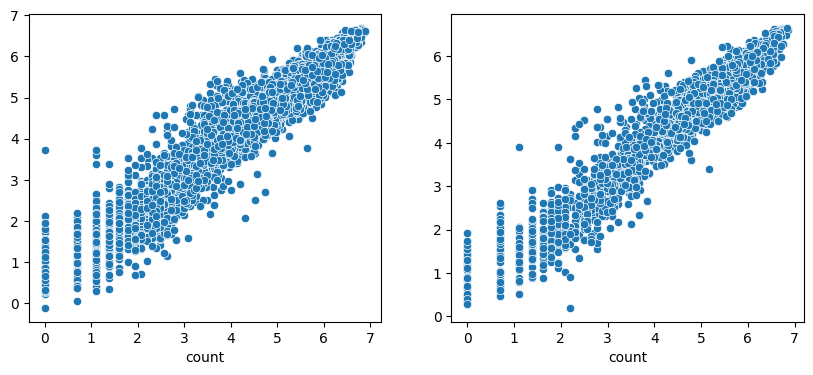

([0.39754924432344646, 0.2855976853157498, 0.9285578170581084],
 [0.4264948650710498, 0.30512624868869176, 0.9184481772569881])

In [29]:
n_estimators = [150,200]
criterion = ['friedman_mse', 'squared_error']

parameters = {'n_estimators': n_estimators,
              'criterion': criterion}

gbr = GradientBoostingRegressor()
gbr_grid = GridSearchCV(gbr, parameters, verbose =4, scoring = 'r2')

gbr_grid.fit(X_train, y_train)
performance(gbr_grid)

In [30]:
gbr_grid.best_estimator_

GradientBoostingRegressor(criterion='squared_error', n_estimators=200)

# Conclusion.

It seems SVM and RandomForest and GradientBoostingRegressor are good models for this dataset since they maximize the r^2 score and minimize the mean squared error. For final desicion, one can train these models on mutilple trian test split and compute the mean squared error. The winner is the one with lowest mean squared error. 

In [ ]:
rf = RandomForestRegressor()
rf1 = RandomForestRegressor(n_estimators=150)
svr = SVR()
gbr = GradientBoostingRegressor(criterion='squared_error', n_estimators=200)
models = [rf, rf1, svr, gbr]

d_mse = {rf :[], rf1: [], svr:[], gbr :[]}
d_r2 =  {rf :[], rf1: [], svr:[], gbr :[]}


for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y_nm, test_size=.25)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    for model in models:
        model.fit(X_train, y_train)
        d_mse[model].append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
        d_r2[model].append(r2_score(y_test,model.predict(X_test)))
        



In [51]:
for model in models:
    print(model, end = ":\n")
    print("MSE:", np.array(d_mse[model]).mean().round(2),end ="     ")
    print("R2:", np.array(d_r2[model]).mean().round(2),end = "\n-----------------------\n")

RandomForestRegressor():
MSE: 0.36     R2: 0.94
-----------------------
RandomForestRegressor(n_estimators=150):
MSE: 0.36     R2: 0.94
-----------------------
SVR():
MSE: 0.33     R2: 0.95
-----------------------
GradientBoostingRegressor(criterion='squared_error', n_estimators=200):
MSE: 0.43     R2: 0.92
-----------------------


##  SVR is the best model

# Predict the test set

In [4]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


We have to apply all preprocessing steps on the test data.

In [5]:
def preprocessing(data):
    data['year'] = pd.DatetimeIndex(data['datetime']).year
    data['month'] = pd.DatetimeIndex(data['datetime']).month
    data['hour'] = pd.DatetimeIndex(data['datetime']).hour
    data['dayofweek'] = pd.DatetimeIndex(data['datetime']).day_name()
    
    categorical = ["season", "holiday", "workingday", "weather", "year", "month", "hour", "dayofweek"]

    diction = {}
    for cat in categorical:
        diction[cat]  = "category"
    data = data.astype(diction)

    data  = data.drop (["atemp", "datetime"], axis = 1)
    data = pd.get_dummies(data, columns=['weather', 'season', 'year', 'month', 'hour', 'dayofweek'])
    return data

In [6]:
train  = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

train_process = preprocessing(train)
train_process = train_process.drop(["casual", "registered"], axis =1)
y = np.log(train_process['count']) # Using this normalization outperforms the r2-score about 15%
X_train = train_process.drop("count", axis =1)

X_test = preprocessing(test)

In [13]:
print(X_test.shape)
print(X_train.shape)

(6493, 58)
(10886, 58)


In [7]:

pipe = Pipeline([('scaler', StandardScaler()), ('svr', SVR())],verbose = True)

In [10]:
pipe.fit(X_train, y)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total=   4.1s


Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR())], verbose=True)

In [27]:
pipe.predict(X_test[:24]).round()

array([2., 2., 1., 1., 1., 2., 4., 4., 5., 5., 4., 4., 4., 4., 4., 4., 5.,
       5., 5., 5., 4., 4., 4., 3.])